# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import stats
from scipy.stats import linregress

from pprint import pprint
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
weather_api_key = "87b82ac74a0d881bca35f1c30d74d4fd"

# Convert Kelvin standard to Celsius
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units={unit}'
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

    city_weather = requests.get(city_url).json()
    print(json.dumps(city_weather,indent=4,sort_keys=True))
    try:    
        # Parse the JSON and retrieve data
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -24.8667,
        "lon": 113.6333
    },
    "dt": 1698180592,
    "id": 2074865,
    "main": {
        "feels_like": 20.51,
        "grnd_level": 1016,
        "humidity": 73,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 20.5,
        "temp_max": 20.5,
        "temp_min": 20.5
    },
    "name": "Carnarvon",
    "sys": {
        "country": "AU",
        "sunrise": 1698183801,
        "sunset": 1698230138
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 217,
        "gust": 3.36,
        "speed": 3.16
    }
}
Processing Record 2 of Set 1 | hamilton
{
    "base

In [73]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [74]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,20.50,73,0,3.16,AU,1698180592
1,hamilton,39.1834,-84.5333,25.04,51,100,4.63,US,1698180592
2,bethel,41.3712,-73.4140,17.47,60,6,0.45,US,1698180592
3,minas de marcona,-15.2119,-75.1103,15.56,87,92,6.94,PE,1698180592
4,blackmans bay,-43.0167,147.3167,9.18,65,73,9.39,AU,1698180593


In [75]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [76]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,20.50,73,0,3.16,AU,1698180592
1,hamilton,39.1834,-84.5333,25.04,51,100,4.63,US,1698180592
2,bethel,41.3712,-73.4140,17.47,60,6,0.45,US,1698180592
3,minas de marcona,-15.2119,-75.1103,15.56,87,92,6.94,PE,1698180592
4,blackmans bay,-43.0167,147.3167,9.18,65,73,9.39,AU,1698180593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

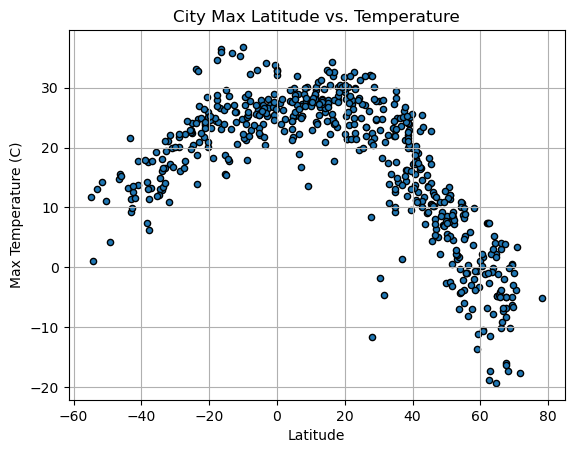

In [77]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat','Max Temp',kind='scatter',edgecolors ='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

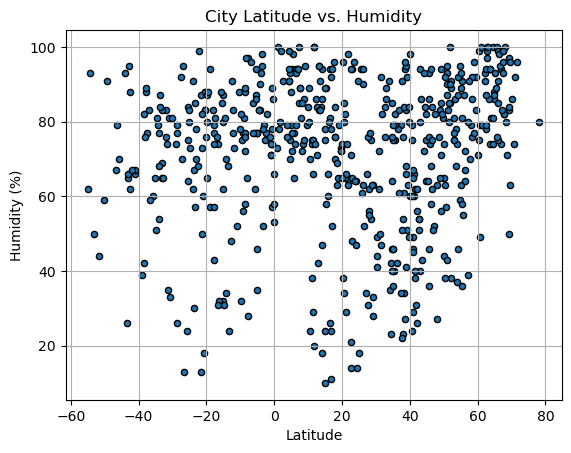

In [78]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat','Humidity',kind='scatter',edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

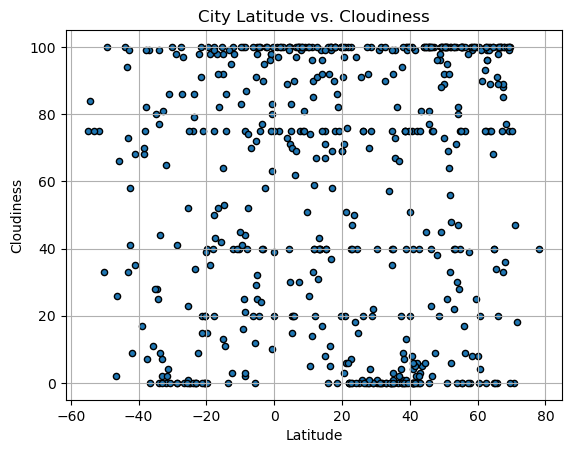

In [79]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat','Cloudiness',kind='scatter',edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

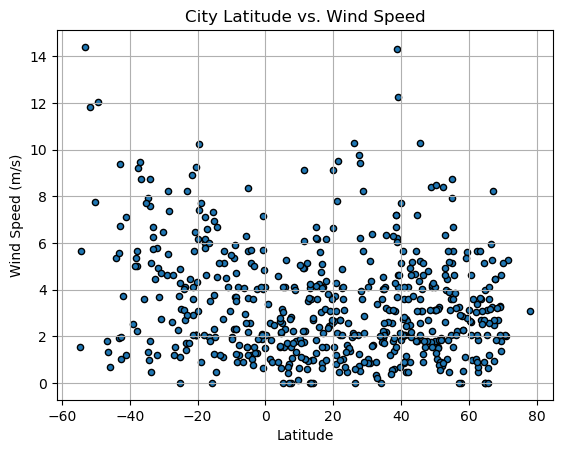

In [80]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat','Wind Speed',kind='scatter',edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values_lat_temp = x_values * slope + intercept
print(regress_values_lat_temp)

City_ID
0      26.393639
1      12.873925
2      12.412123
3      24.355701
4      30.224747
         ...    
566    10.538279
567    22.951320
568    22.559007
569     9.968848
570    24.621430
Name: Lat, Length: 571, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/2863398698.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hamilton,39.1834,-84.5333,25.04,51,100,4.63,US,1698180592
2,bethel,41.3712,-73.4140,17.47,60,6,0.45,US,1698180592
9,tiksi,71.6872,128.8694,-17.61,96,18,5.26,RU,1698180197
10,stanley,54.8680,-1.6985,8.76,95,40,2.06,GB,1698180197
11,colonia,50.9333,6.9500,12.14,90,0,1.54,DE,1698180197


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<=0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,20.50,73,0,3.16,AU,1698180592
3,minas de marcona,-15.2119,-75.1103,15.56,87,92,6.94,PE,1698180592
4,blackmans bay,-43.0167,147.3167,9.18,65,73,9.39,AU,1698180593
5,puerto natales,-51.7236,-72.4875,14.25,44,75,11.83,CL,1698180196
6,margaret river,-33.9500,115.0667,12.89,54,77,7.59,AU,1698180014


###  Temperature vs. Latitude Linear Regression Plot

In [86]:
# Linear regression on Northern Hemisphere

x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north)

# Get regression values
regress_values_northern = x_values_north * slope + intercept
print(regress_values_northern)

City_ID
1      13.503267
2      12.278469
9      -4.693358
10      4.722546
11      6.925312
         ...    
559    15.767446
563    20.678449
565    32.443963
566     7.308628
569     5.798373
Name: Lat, Length: 396, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/50233783.py:6: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north)


In [87]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)

# Get regression values
regress_values_southern = x_values_south * slope + intercept
print(regress_values_southern)

City_ID
0      20.615880
3      24.054078
4      14.152431
5      11.051792
6      17.381200
         ...    
562    18.277429
564    18.723354
567    26.423404
568    27.085275
570    23.605768
Name: Lat, Length: 175, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/340845053.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)


**Discussion about the linear relationship:** There appears to be a negative linear relationship in both regression calculations above, as seen by the increasing values of regression with every row, implying as the latitude increases the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

In [88]:
# Northern Hemisphere
x_values_north_hum = northern_hemi_df['Lat']
y_values_north_hum = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_hum, y_values_north_hum)

# Get regression values
regress_values_northern_hum = x_values_north_hum * slope + intercept
print(regress_values_northern_hum)

City_ID
1      72.121553
2      72.425910
9      76.643339
10     74.303526
11     73.756147
         ...    
559    71.558913
563    70.338549
565    67.414867
566    73.660895
569    74.036187
Name: Lat, Length: 396, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/1024984931.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_hum, y_values_north_hum)


In [89]:
# Southern Hemisphere
x_values_south_hum = southern_hemi_df['Lat']
y_values_south_hum = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_hum, y_values_south_hum)

# Get regression values
regress_values_southern_hum = x_values_south_hum * slope + intercept
print(regress_values_southern_hum)

City_ID
0      69.887264
3      71.292661
4      67.245268
5      65.977853
6      68.565058
         ...    
562    68.931400
564    69.113676
567    72.261145
568    72.531692
570    71.109410
Name: Lat, Length: 175, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/2958285093.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_hum, y_values_south_hum)


**Discussion about the linear relationship:** The linear relationship appears to be less stronger than the former regression calculations earlier.

### Cloudiness vs. Latitude Linear Regression Plot

In [94]:
# Northern Hemisphere
x_north_cloud = northern_hemi_df['Lat']
y_north_cloud = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_north_cloud, y_north_cloud)

# Get regression values
regress_values_northern_cloud = x_north_cloud * slope + intercept
print(regress_values_northern_cloud)



City_ID
1      57.636790
2      57.721257
9      58.891707
10     58.242346
11     58.090434
         ...    
559    57.480642
563    57.141958
565    56.330558
566    58.063999
569    58.168152
Name: Lat, Length: 396, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/3923991484.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_north_cloud, y_north_cloud)


In [95]:
# Southern Hemisphere
x_south_cloud = southern_hemi_df['Lat']
y_south_cloud = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_south_cloud, y_south_cloud)

# Get regression values
regress_values_southern_cloud = x_south_cloud * slope + intercept
print(regress_values_southern_cloud)

City_ID
0      51.127668
3      54.129026
4      45.485433
5      42.778746
6      48.303970
         ...    
562    49.086329
564    49.475596
567    56.197317
568    56.775094
570    53.737675
Name: Lat, Length: 175, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/1130580351.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_south_cloud, y_south_cloud)


**Discussion about the linear relationship:** As the Latitude increases, the cloudiness doesn't appear to change much. 

### Wind Speed vs. Latitude Linear Regression Plot

In [92]:
# Northern Hemisphere
x_north_wind = northern_hemi_df['Lat']
y_north_wind = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_north_wind, y_north_wind)

# Get regression values
regress_values_northern_wind = x_north_wind * slope + intercept
print(regress_values_northern_wind)

City_ID
1      3.060950
2      3.079617
9      3.338286
10     3.194777
11     3.161205
         ...   
559    3.026442
563    2.951593
565    2.772274
566    3.155363
569    3.178381
Name: Lat, Length: 396, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/2205515631.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_north_wind, y_north_wind)


In [93]:
# Southern Hemisphere
x_south_wind = southern_hemi_df['Lat']
y_south_wind = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_south_wind, y_south_wind)

# Get regression values
regress_values_southern_wind = x_south_wind * slope + intercept
regress_values_southern_wind.head(50)

/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/3994386747.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_south_wind, y_south_wind)


City_ID
0      4.331683
3      3.774851
4      5.378468
5      5.880630
6      4.855554
7      5.035359
8      4.889132
12     2.940157
14     5.079520
17     3.598651
19     4.222068
20     3.137074
26     4.343178
29     3.687654
31     2.900881
33     2.932123
39     5.432497
42     3.041468
47     5.394213
50     6.058059
57     3.773940
58     5.067028
62     6.028132
68     3.224341
70     5.743735
75     5.364966
76     2.947505
77     5.573596
81     5.582934
83     4.080801
85     4.882586
86     4.039466
89     4.544114
90     4.801646
91     3.996758
92     3.720494
94     3.921234
98     3.186853
99     3.765549
107    4.356673
108    5.110698
113    5.962896
114    3.848178
116    4.567184
117    4.279569
118    3.924118
121    2.952402
122    3.416044
124    3.192187
126    3.720995
Name: Lat, dtype: float64

**Discussion about the linear relationship:** There appears to be no significant relationship between wind speed vs latitude, as seen by the regress values, as they are hovering around the 3.5 value.